# Segmentação de clientes de um supermercado

Um supermercado, através de cartões de fidelidade, possui alguns dados básicos sobre seus clientes, como idade, gênero, renda anual e pontuação de gastos. Tal pontuação é algo que o supermercado atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

O objetivo deste projeto é segmentar os clientes com base em seus dados de compra, para que o supermercado possa entender melhor os clientes e formular estratégias de negócios de acordo.

Link original para o dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Estrutura de pastas do projeto:

```bash
├── README.md
├── dados
│   ├── Mall_Customers.csv
├── notebooks
│   └── projeto_supermercado_01_eda.ipynb
│   └── ...
├── reports
│   └── ...
```

In [25]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import warnings 
warnings.filterwarnings('ignore')

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")


Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.7.2
NumPy                |     1.26.0
Pandas               |      2.1.1
Scikit-Learn         |      1.3.2
Seaborn              |     0.12.2

Versão do Python: 3.10.12


In [5]:
#importando o arquivo 
DADOS = r'../dados/Mall_Customers.csv'
base = pd.read_csv(DADOS)

In [6]:
#Visualizando a base
base.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [18]:
#dados estatísticos da base
with pd.option_context('display.float_format',"{:.1f}".format):
    display(base.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.5,38.9,60.6,50.2
std,57.9,14.0,26.3,25.8
min,1.0,18.0,15.0,1.0
25%,50.8,28.8,41.5,34.8
50%,100.5,36.0,61.5,50.0
75%,150.2,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


In [19]:
#dados estatísticos das colunas tipo string
base.describe(exclude="number")

,Gender
count,200
unique,2
top,Female
freq,112


In [21]:
#Verificando os valores nulos
base.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
#ProfileReport
from ydata_profiling import ProfileReport
profile = ProfileReport(base)

profile.to_file('../reports/eda_supermercado.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:

df_analise = base.copy()
df_analise.drop('CustomerID',axis=1,inplace=True)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


def box_plot(df ,col):
    fig,ax = plt.subplots()

    sns.boxplot(data = df, x='Gender', y = col,ax = ax)


    plt.show()

In [45]:
colunas =df_analise.columns.to_list()[1:]

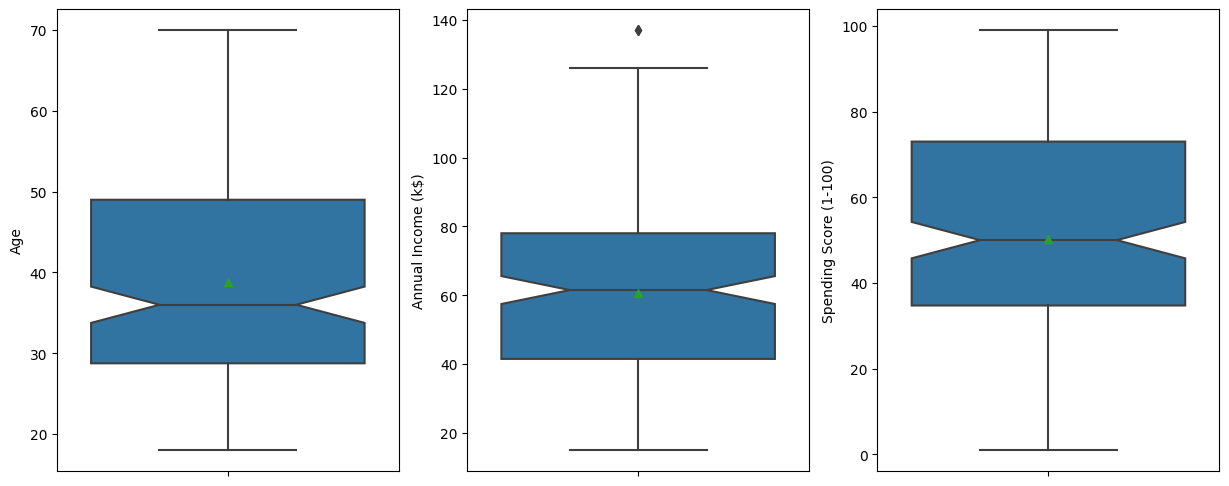

In [100]:
fig,axs = plt.subplots(ncols=3,figsize =(15,6))

for ax,col in zip(axs,df_analise.select_dtypes('number')):
    sns.boxplot(data = df_analise, y = col,ax = ax, notch =True,showmeans=True)
plt.show()

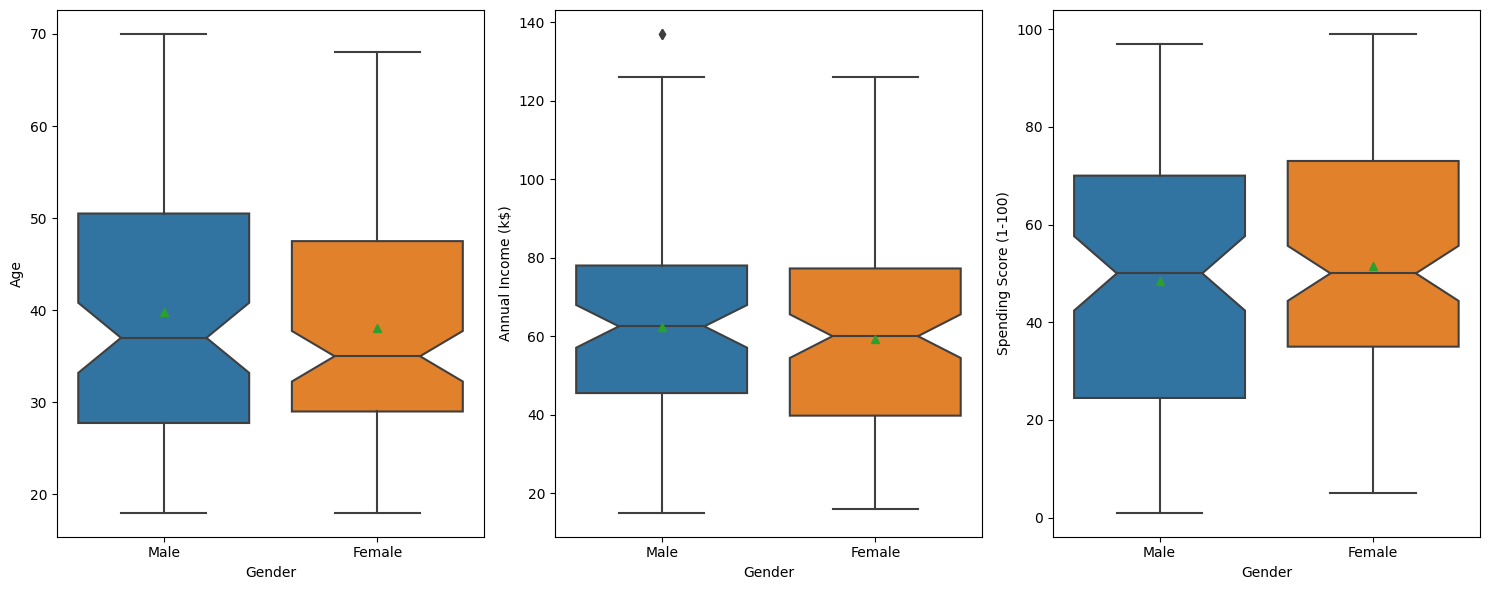

In [113]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize =(15,6),tight_layout = True)

for ax,col in zip(axs,df_analise.select_dtypes('number')):
    sns.boxplot(data = df_analise,x ="Gender", y = col,ax = ax,notch =True,showmeans=True)
    
plt.show()

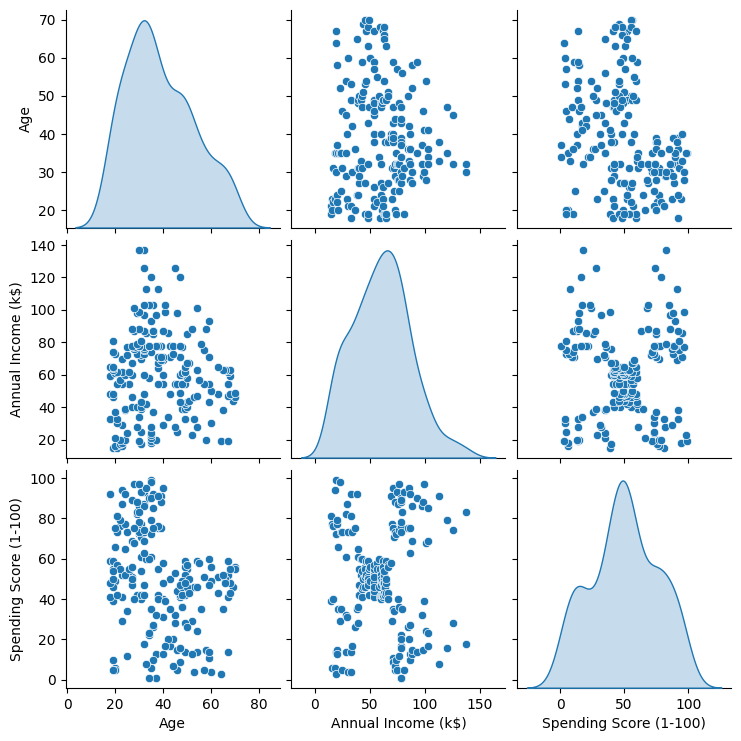

In [118]:
#Gráficos de Correlação
sns.pairplot(df_analise,diag_kind='kde');

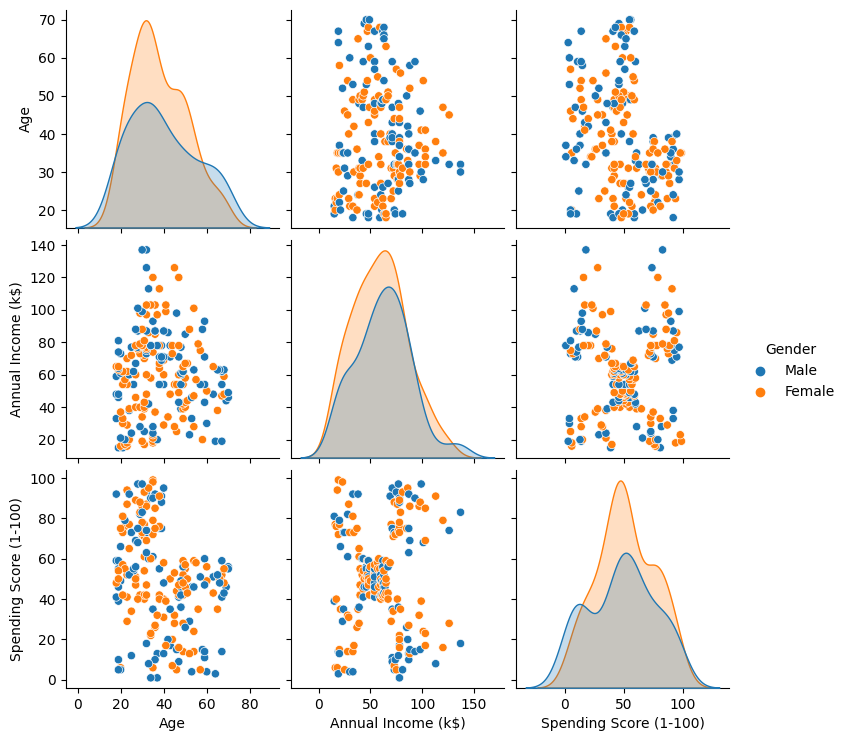

In [144]:
#Gráficos de Correlação
sns.pairplot(df_analise,hue='Gender');

In [170]:
#Exportando a base Tratada
df_analise.to_csv('../dados/Mall_customers_sem_CustumerID.csv',index=False)